# Human Machine Interaction and Bias Mitigation
### Predicting Diabetes Insipidus using dedicated Biomarkers

Diabetes insipidus (DI) is a rare condition characterized by an imbalance in water regulation, leading to excessive urination and intense thirst. Unlike diabetes mellitus, DI is not related to blood sugar levels but rather to a deficiency in the hormone vasopressin (antidiuretic hormone, ADH) or the kidneys' response to it. There are two primary types of DI: central and nephrogenic. 

- **Central diabetes insipidus**
    - occurs due to insufficient production or release of ADH from the hypothalamus or pituitary gland, often resulting from injury, surgery, or genetic factors. 
- **Nephrogenic diabetes insipidus**
    - on the other hand, arises when the kidneys fail to respond adequately to ADH, which can be caused by genetic mutations, certain medications, or chronic kidney disorders. 
    
Understanding these variations is crucial for accurate diagnosis and effective treatment, as the underlying causes and management strategies differ significantly between the two types.

In [607]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [608]:
# Load the data file
file_path = '../data/diabetes_study_final_data.csv'
df = pd.read_csv(file_path, delimiter=',')

# Exploratory data analysis

In [609]:
# Display the first few rows of the dataframe
df

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
0,56,0,1,18.303039,91.118631,0.000000,0.0
1,69,0,4,28.052368,108.830756,0.301111,0.0
2,46,1,4,30.947376,91.569805,0.000000,0.0
3,32,1,0,26.874690,98.878487,0.301111,0.0
4,60,1,3,28.052368,90.062769,0.000000,0.0
...,...,...,...,...,...,...,...
995,78,1,3,28.013502,106.846173,0.000000,0.0
996,23,0,1,29.311285,103.303079,0.000000,0.0
997,35,1,3,31.697081,85.511755,1.000000,0.0
998,68,0,0,23.944416,108.491801,1.000000,0.0


In [610]:
# check the dimensions of the data with df.shape attribute.
df.shape

(1000, 7)

We can view the top five and bottom five rows of the dataset with df.head() and df.tail() methods respectively.

In [611]:
df.head()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
0,56,0,1,18.303039,91.118631,0.000000,0.0
1,69,0,4,28.052368,108.830756,0.301111,0.0
2,46,1,4,30.947376,91.569805,0.000000,0.0
3,32,1,0,26.874690,98.878487,0.301111,0.0
4,60,1,3,28.052368,90.062769,0.000000,0.0


In [612]:
df.tail()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
995,78,1,3,28.013502,106.846173,0.0,0.0
996,23,0,1,29.311285,103.303079,0.0,0.0
997,35,1,3,31.697081,85.511755,1.0,0.0
998,68,0,0,23.944416,108.491801,1.0,0.0
999,22,1,1,28.052368,93.648540,1.0,0.0


**Interpretation**

We can see that there are lot of discrepancies in the dataset.

For example, the age and sex columns are combined together with an underscore. There should be two separate columns of age and sex.

The height and weight columns contain missing values. Some values are coded as "xx", "?", "0" and negative values. They are all invalid values as height and weight must be positive real numbers.

The three columns spend_A, spend_B and spend_C denote spending at three supermarkets A,B and C. These columns must contain positive real numbers. The missing values in these columns denote nothing spend in that market. The negative value and the value coded as "xx" should be addressed properly.

In [613]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                1000 non-null   int64  
 1   Gender             1000 non-null   int64  
 2   Ethnicity          1000 non-null   int64  
 3   BMI                1000 non-null   float64
 4   BloodSugarLevel    1000 non-null   float64
 5   InsulinResistance  1000 non-null   float64
 6   GeneticFactor      1000 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 54.8 KB


**Interpretation**

We can see that this method prints information of all columns. Several columns contain missing values. We have seen that columns contain missing and invalid values are coded differently. So, we need to explore this issue further.


|Feature|Description|
|--|--|
|polydipsia|Binary (0: No, 1: Yes)|
|polyuria|Binary (0: No, 1: Yes)|
|nocturia|Binary (0: No, 1: Yes)|
|serum_sodium|Continuous (mEq/L)|
|serum_osmolality|Continuous (mOsm/kg)|
|urine_osmolality|Continuous (mOsm/kg)|
|urine_specific_gravity|Continuous|
|serum_adh|Continuous (pg/mL)|
|plasma_copeptin|Continuous (pmol/L)|
|family_history|Binary (0: No, 1: Yes)|
|mri_abnormalities|Binary (0: No, 1: Yes)|
|avp_gene_mutation|Binary (0: No, 1: Yes)|
|aqp2_gene_mutation|Binary (0: No, 1: Yes)|
|avpr2_gene_mutation|Binary (0: No, 1: Yes)|
|bmi|Continuous (kg/m²)|
|blood_pressure|Continuous (mmHg)|
|age|Continuous (years)|
|sex|Categorical (Male, Female)|
|electrolyte_levels|Continuous (various ions, e.g., K⁺, Ca²⁺)|

### Handling invalid values

view the summary statistics of numerical columns with df.describe() method. It enable us to detect outliers in the data which require further investigation.



In [614]:
df.describe()

,Age,Gender,Ethnicity,BMI,BloodSugarLevel,InsulinResistance,GeneticFactor
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.380000,0.477000,1.888000,28.052368,105.053928,0.301111,0.150000
std,18.378666,0.499721,1.403362,3.743058,14.235055,0.435418,0.338917
min,18.000000,0.000000,0.000000,15.921951,70.000000,0.000000,0.000000
25%,35.000000,0.000000,1.000000,25.820978,96.149359,0.000000,0.000000
50%,50.000000,0.000000,2.000000,28.052368,105.053928,0.000000,0.000000
75%,66.000000,1.000000,3.000000,30.341792,113.705994,1.000000,0.000000
max,80.000000,1.000000,4.000000,40.772430,140.000000,1.000000,1.000000


**Number of unique values in column**

In [615]:
# Number of unique values in column
for column in df.columns:
    num_distinct_types = df[column].nunique()
    print(f"Number of distinct types in {column}: {num_distinct_types}")

Number of distinct types in Age: 63
Number of distinct types in Gender: 2
Number of distinct types in Ethnicity: 5
Number of distinct types in BMI: 901
Number of distinct types in BloodSugarLevel: 887
Number of distinct types in InsulinResistance: 3
Number of distinct types in GeneticFactor: 3


Check for mean imputed values in the dataset

In [616]:
df_original = df.copy()
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        mean_value = df[column].mean()        
        
        # Check for mean-imputed values
        imputed_mask = (df[column] == mean_value)
        if imputed_mask.any():
            print(f"Attention: Mean imputed value found in column: {column}")
        else:
            print(f"OK: No Mean imputed value found in column: {column}")
        

# Calculate the mean of the 'GeneticFactor' column
#mean_value = df['GeneticFactor'].mean()

# Check if there are values which are already mean imputed
#df = df[df['GeneticFactor'] != mean_value]

OK: No Mean imputed value found in column: Age
OK: No Mean imputed value found in column: Gender
OK: No Mean imputed value found in column: Ethnicity
OK: No Mean imputed value found in column: BMI
Attention: Mean imputed value found in column: BloodSugarLevel
Attention: Mean imputed value found in column: InsulinResistance
Attention: Mean imputed value found in column: GeneticFactor


**Data Type Transformation**

There is an invalid value coded as "xx" in column. We can coerce invalid values to "NaN" using the errors keyword as follows:-

In [617]:
# Transform to numeric
df["Age"] = pd.to_numeric(df["Age"], errors='coerce')
#df.loc[:, 'BMI'] = (df['BMI']).astype(int)

# Round all values to 2 decimal places
df['BMI'] = df['BMI'].round(2)

**Box plot**

Box plot help us to explore outliers in the data. It help us to identify potentially bad data.

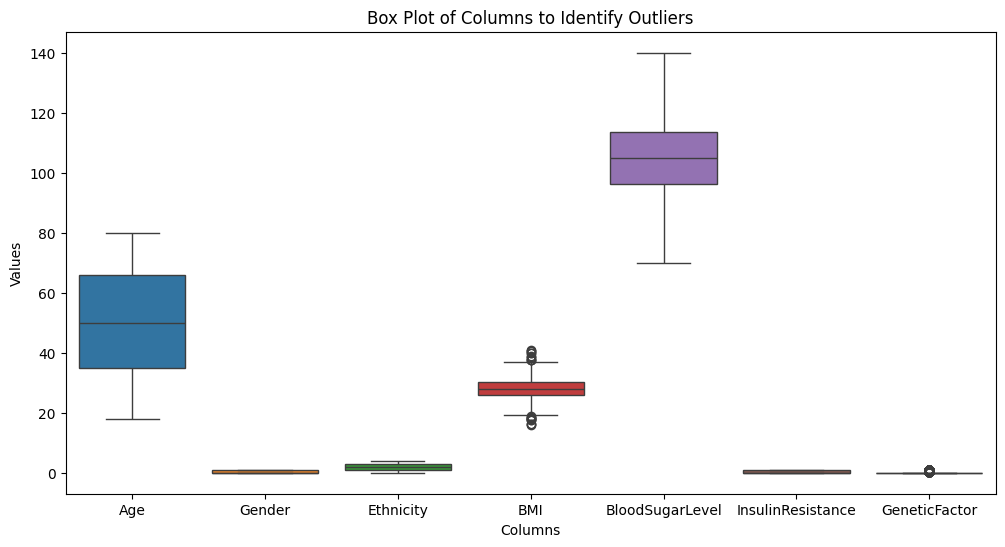

In [618]:
# Identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of Columns to Identify Outliers')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.show()

**Scatter plot**

Scatter plot help us to explore relationship between two numeric variables. It help us to identify potentially bad data.

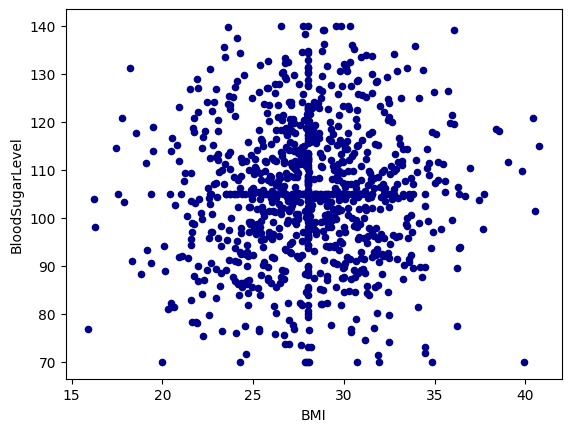

In [619]:
df.plot(kind='scatter',x='BMI', y='BloodSugarLevel', c='DarkBlue')
plt.show()

**Split column**

In [620]:
#df[['age','sex']] = df.age_sex.str.split("_", expand = True)
#df.drop(['age_sex'], axis=1, inplace=True)

**Reorder the column labels**

In [621]:
df = df[['Gender','Age','Ethnicity','BMI','BloodSugarLevel','InsulinResistance','GeneticFactor']]

**Dealing with negative numerical values**

In [622]:
# Suppress settingwithcopywarning

#pd.set_option('mode.chained_assignment', None)
#df['weight(kg)'].replace(-60, 60, inplace=True)

**Dealing with outliers**

When dealing with outliers in data and using imputation techniques like KNN imputation, it's important to handle the imputation process correctly to avoid data leakage and ensure the validity of your model evaluation. First we train test split before any imputation

In [623]:
from sklearn.model_selection import train_test_split

X = df.drop('GeneticFactor', axis=1)
y = df.GeneticFactor
training_features, testing_features, training_target, testing_target = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=42)

In [624]:
# Impute missing data with kNN (k-nearest neighbours)

from sklearn.neighbors import KNeighborsClassifier
# Replace non-0/1 values with NaN for the InsulinResistance column
training_features['InsulinResistance'] = training_features['InsulinResistance'].apply(lambda x: x if x in [0, 1] else np.nan)

# Separate the rows with NaN values in 'InsulinResistance'
df_missing = training_features[training_features['InsulinResistance'].isna()]
df_complete = training_features.dropna(subset=['InsulinResistance'])

features = df_complete.drop(columns='InsulinResistance')
target = df_complete['InsulinResistance']

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(features, target)

# Predict the missing values
df_missing['InsulinResistance'] = knn.predict(df_missing.drop(columns='InsulinResistance'))

# Combine the datasets
df_combined = pd.concat([df_complete, df_missing]).sort_index()
df = df_combined

**Mean Imputation of missing data**

In [625]:
df['InsulinResistance'] = df['InsulinResistance'].apply(lambda x: x if x in [0, 1] else np.nan)

# Calculate mean for each column
mean_values = df.mean()

# Fill missing values with mean
df = df.fillna(mean_values)

## Summary

- Invalid Values
- Unbalanced dataset
- Negative Values
- 
- Data Type Transformation
- Outliers

# Evaluation of biomarkers

Discuss its significance and usability for diagnosis. 
Highlight the relevance of each biomarker in the context of the disease or condition being diagnosed.

In [ ]:
# Generate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Diabetest Study')
plt.show()

# Identify and Address Problems/Biases

- Analyze the data for potential problems or biases. This could include any of the biases we have discusses in class.
- Discuss the expected effects of corrections on the dataset and subsequent analyses. Explain how these corrections will improve the reliability and validity of your results.

**Most common Biases**
- Stereotyping
- The bandwagon effect
- Priming
- Selective preception
- Confirmation bias


## Preprocessing: Handle missing data, normalize values, encode categorical data

## Normalize values

## Encode Categorical data

# Parameter Importance Analysis

- Perform an analysis to determine the importance of different biomarkers.
- Identify which biomarkers are the most critical for accurate diagnosis and discuss why they are significant.

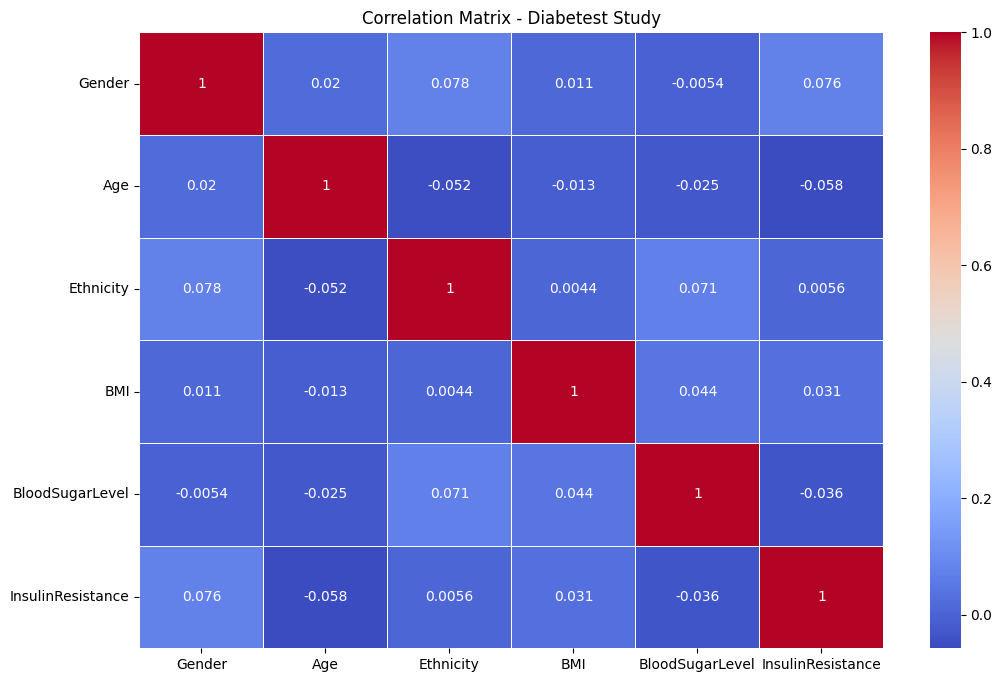

# Model Creation for Prognosis

- Using the corrected data and insights from the parameter importance analysis, develop a predictive model to provide a reliable diagnosis.
- Explain the choice of model and justify why it is suitable for this task.
- Validate the model using appropriate techniques such as cross-validation, and evaluate its performance using relevant metrics (e.g., accuracy, precision, recall, F1-score).